# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [1]:
import pandas as pd

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [2]:
import tweepy

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
print (tweepy.__version__)

4.12.1


## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [4]:
# Collect tweets
#query = "Qatar" + "#MUFC" +  " -filter:retweets" 
#cutoff_date = "2023-03-02" 
searchTerms = "(Qatar AND #MUFC) OR #glazers OR #GlazersSellManUtd OR #QatarIn OR #GlazersOutNow" + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=searchTerms, lang="en", tweet_mode = 'extended' ).items(1500)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.full_text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('current_set.csv', quotechar='"', encoding='utf8', index = False, header=True)

In [5]:
# Display the dataset
df = pd.read_csv("current_set.csv")
df

,date,user,location,text
0,2023-03-06 17:32:15+00:00,LUHG07,NaN,@UnitedStandMUFC @RobDawsonESPN Could see he w...
1,2023-03-06 17:19:55+00:00,davidtings83,"Manchester, England",@Muppetiers No it must not Chirang!\n\nWe don’...
2,2023-03-06 17:17:05+00:00,davidtings83,"Manchester, England",@Muppetiers Qatar with their FULL takeover are...
3,2023-03-06 17:16:28+00:00,stagger77_paul,Yorkshire,Yes it was a bad result. Is it the end of our ...
4,2023-03-06 17:11:10+00:00,Theestateagentn,"London, England",Glazers I hear @LFC wants you to buy them #LFC...
...,...,...,...,...
1495,2023-03-03 09:18:15+00:00,ChrisNZviking,Auckland,"If we managed to sign dejong last summer,we wo..."
1496,2023-03-03 09:14:34+00:00,ReDevil_UTD,NaN,Fuck the Glazer Scum #GlazersOut #QatarIn
1497,2023-03-03 09:09:49+00:00,eileenmufam1,"England, United Kingdom",@ThatsFootballTV It’s a no brainer #GlazersOut...
1498,2023-03-03 09:04:16+00:00,LouisejayneWal1,"Sale, England",Good morning and happy Friday everyone. Hope y...


# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [6]:
# # Importing essential libraries
# import nltk
# import string
# from nltk.tokenize import TweetTokenizer
# from nltk.corpus import stopwords
# import re


# # Load the dataset
# tweets_text = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')
# tweets_text

# # make a list to store the pre-processed tweets
# tweets_list = []

# # Remove stop words
# sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
# my_stop_words=stopwords.words('english')
# my_stop_words.extend(sw_list)

# for tweets in tweets_text['text']:
#     # Lowercase words
#     tweets = tweets.lower()
#     # Remove punctuation
#     no_punc_text=tweets.translate(str.maketrans('','',string.punctuation))
#     # Remove urls
#     no_url_text=re.sub(r'http\S+', '', no_punc_text)
#     # Tokenisation
#     tknzr = TweetTokenizer(strip_handles=True)
#     tweets_tokens=tknzr.tokenize(no_url_text)
#     no_stop_tokens=[word for word in tweets_tokens if not word in my_stop_words]
#     tweets_tokens_joined=' '.join(no_stop_tokens)
#     tweets_list.append(tweets_tokens_joined)
# print(tweets_list)

## Cleaning V2

In [27]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove whitespace
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s{2,}', ' ', x))

# Remove hashtags, mentions, and usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https\S+\s\s\S\s\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'tco+', '', x))

# Remove vague letters
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# Print out the first rows 
#print(tweets_df['text_processed'].head()

# Removing duplicate tweets
unique_tweets = list(set(list(tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

print(unique_tweets)
#tweets_df

['qatar takeover asap mufc livmun gvwavpnuut', 'therapy army join us at 1035 pm uk liverpool vs mufc match previewthe biggest game of the seasonwe can not get beat and our away record against big teams is not great can temhag pull it out of the hat livmun glazerssellmanutd  youtube', 'sheikh jassim is offering to buy out the glazers and mufcs minority shareholders in their entirety telefootballglazersout qatar mulive ', 'winners are losers who get up and give it one more try except for the glazersoutnow', 'qatari assalam walekum how long it will take to takeover mufc qatarin', 'thanks glazers ten hag wanted gakpo and you stuck your hands in your pockets as always and said no money for you and he fucking scores on united hurry up and sell the club you fucking parasites glazersarevermin glazersdoonenow glazersout', 'alternativemufc back the manager trust the process all the better teams took 46 years to be rebuilt just believe and support keep the red flag flying and keep your chins held

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

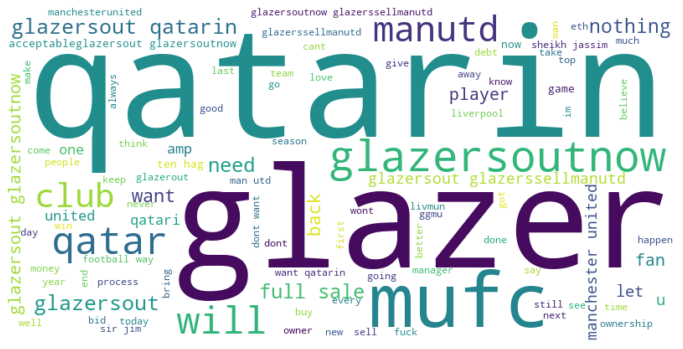

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into a single string
tweets_text = ' '.join(tweets_df['text_processed'])

# Create a word cloud object with the desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(tweets_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# Get the frequency of each word in the text
word_freq = wordcloud.process_text(tweets_text)

# Print the top 20 words with their frequency
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word}: {freq}")

qatarin: 346
glazer: 291
mufc: 266
glazersoutnow: 259
qatar: 212
will: 205
manutd: 182
club: 162
glazersout qatarin: 153
glazersout: 150
need: 132
full sale: 129
nothing: 123
want: 117
back: 109
player: 103
glazersout glazersoutnow: 101
fan: 97
u: 88
let: 84


# Topic Modelling

In [10]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egatzinski\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"glazersoutnow" + 0.019*"mufc" + 0.015*"glazersout" + 0.012*"glazers" '
  '+ 0.011*"better" + 0.010*"manutd" + 0.010*"fans" + 0.009*"united" + '
  '0.008*"back" + 0.008*"full"'),
 (1,
  '0.024*"qatarin" + 0.023*"glazersout" + 0.020*"glazersoutnow" + 0.012*"mufc" '
  '+ 0.010*"manutd" + 0.010*"qatar" + 0.009*"united" + 0.008*"glazers" + '
  '0.008*"get" + 0.007*"want"'),
 (2,
  '0.035*"qatarin" + 0.026*"glazersout" + 0.019*"glazersoutnow" + '
  '0.017*"qatar" + 0.013*"mufc" + 0.012*"glazers" + 0.009*"united" + '
  '0.008*"need" + 0.008*"want" + 0.008*"club"'),
 (3,
  '0.028*"qatarin" + 0.021*"glazersout" + 0.021*"glazers" + '
  '0.019*"glazersoutnow" + 0.012*"get" + 0.012*"want" + 0.012*"sale" + '
  '0.012*"full" + 0.011*"manutd" + 0.009*"else"'),
 (4,
  '0.024*"glazersout" + 0.020*"glazersoutnow" + 0.013*"qatarin" + 0.009*"get" '
  '+ 0.008*"club" + 0.007*"glazers" + 0.007*"glazer" + 0.007*"mufc" + '
  '0.006*"manutd" + 0.006*"qatar"')]


In [12]:
# visualise the topics
!pip install pyldavis

In [13]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\egatzinski\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.025202  0.012472       1        1  28.894908
0     -0.094623 -0.005633       2        1  21.550748
3      0.029435 -0.081058       3        1  18.426720
1      0.033631  0.039115       4        1  17.848083
4      0.006356  0.035104       5        1  13.279542, topic_info=        Term        Freq       Total Category  logprob  loglift
7    qatarin  431.000000  431.000000  Default  30.0000  30.0000
526   better   62.000000   62.000000  Default  29.0000  29.0000
315     else   94.000000   94.000000  Default  28.0000  28.0000
67       get  130.000000  130.000000  Default  27.0000  27.0000
137   glazer   45.000000   45.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
4       need    8.662690   90.273668   Topic5  -5.6711  -0.3249
45       hag    7.090267   51.504001   Topic5  -5.8714   0.0360
88      dont    7.577625   68.757341   Topic5  -5.8049  -0.1864
60      back    7.529124   91.666321   Topic5  -5.8113  -0.4804
5    players    7.324260   67.833539   Topic5  -5.8389  -0.2069

[402 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3201      4  0.834199       accepts
3121      1  0.645930  adamcrafton_
3121      2  0.215310  adamcrafton_
3121      5  0.071770  adamcrafton_
4286      2  0.623349     addresses
...     ...       ...           ...
219       2  0.553306         years
219       4  0.069163         years
219       5  0.103745         years
528       2  0.833414    yesterdays
3191      5  0.656212            zu

[760 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [14]:
!pip install vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))

manutd sell this fkin club rn glazersout qatarin	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
d_degea squad is weak main men carrying the team are tired glazersoutnow	{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.7003}
full sale only  nothing else is acceptableglazersout glazerssellmanutd httpstcozfipjx3pna	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hammettstuart well said mate  time for the scum to bugger off  glazersoutnow	{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}
alexferguson has manipulated eriktenhag and the manutd players just like how jerryschuman and melissaschuman have done with shannonruth fergusonoutnow glazersoutnow mufc niickcarter bsb istandwithnickcarter	{'neg': 0.096, 'neu': 0.812, 'pos': 0.092, 'compound': -0.0258}
manunitedzone_ telegraphducker tom_morgs stay in your lane at nice ratcliffeout qatarin httpstcoxbndt1qlrq	{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}
qatari please make it happen soon glazersou

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
import spacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')


In [ ]:
for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])


# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [ ]:
!pip install spacy-entity-linker
!python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

In [ ]:
from spacy_entity_linker import EntityLinker
!python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

In [ ]:
for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass
